# Series de Tiempo -- R -- Modelos estocásticos precios
Notas de clase sobre pronóstico de series de tiempo usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial modelado de precios usando **R** en el contexto de la analítica. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

> 
* [Introducción](#Introducción)
* [Ruido blanco](#Ruido-blanco)
* [Medidas de cambio en el precio de un activo.](#Medidas-de-cambio-en-el-precio-de-un-activo.)
* [Modelos de paseo aleatorio](#Modelos-de-paseo-aleatorio)
    * [Modelo de paseo aleatorio con estados discretos](#Modelo-de-paseo-aleatorio-con-estados-discretos)
    * [Paseo aleatorio continuo](#Paseo-aleatorio-continuo)
    * [Proceso Browniano con deriva o proceso de Wiener](#Proceso-Browniano-con-deriva-o-proceso-de-Wiener)
    * [Proceso Browniano estándar](#Proceso-Browniano-estándar)
    * [Proceso Browniano con tendencia](#Proceso-Browniano-con-tendencia)
    * [Proceso Browniano geométrico o exponencial](#Proceso-Browniano-geométrico-o-exponencial)
    * [Proceso de Orstein-Uhlenbeck o reversión a la media](#Proceso-de-Orstein-Uhlenbeck-o-reversión-a-la-media)
* [Modelos de precios](#Modelos-de-precios)
    * [Representación general](#Representación-general)
        * [Prueba ACF y PACF serie con tendencia](#Prueba-ACF-y-PACF-serie-con-tendencia)
        * [Prueba ACF y PACF serie con tendencia y ciclo](#Prueba-ACF-y-PACF-serie-con-tendencia-y-ciclo)
        * [Prueba ACF y PACF de un proceso autorregresivo](#Prueba-ACF-y-PACF-de-un-proceso-autorregresivo)
        * [Prueba ACF y PACF de un proceso de medias moviles](#Prueba-ACF-y-PACF-de-un-proceso-de-medias-moviles)
    * [Proceso Browniano con tendencia](#Proceso-Browniano-con-tendencia)
    * [Genereación de la serie sintética](#Genereación-de-la-serie-sintética)

**Bibliografía**.

> [Bibliografia aquí] ()

---

# Introducción

[Contenido](#Contenido)

En este libro se introducen los principales modelos estocásticos de precios, los cuales tienen diferentes aplicaciones, tal como la valoración de derivados financieros.

# Ruido blanco

[Contenido](#Contenido)

Ruido blanco es un tipo básico de series de tiempo muy importante, donde las variables aleatorias que se generan tienen una media de 0, varianza finita e identica, adicionalmente las variables aleatorias no están correlacionadas entre sí. En algunas fuentes bibliograficas especifican que estas variables son independiente e identicamente distribuidas $iid$. 


In [1]:
## Generación serie tipo ruido blanco
set.seed(1)         # Semilla (omitir)

x <- rnorm(100)     # 100 datos iid x~N(0,σ^2)

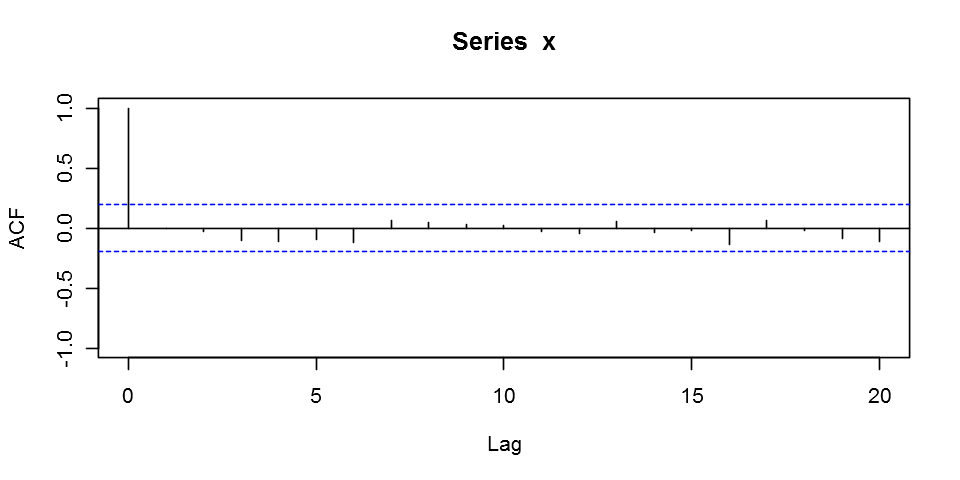

In [2]:
## ACF serie tipo ruido blanco

options(repr.plot.width=8, repr.plot.height=4)

acf(x,              # Serie
    ylim=c(-1,1))   # Limite ejer y

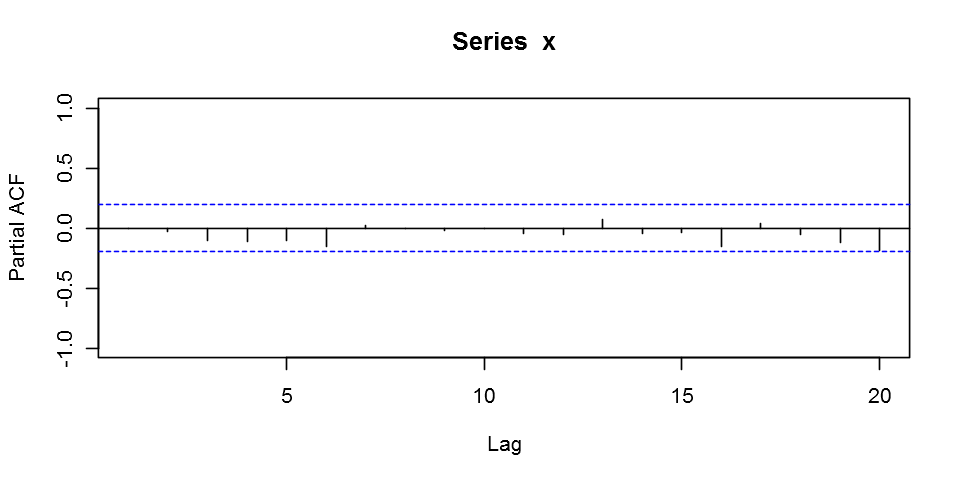

In [3]:
## PACF serie tipo ruido blanco

options(repr.plot.width=8, repr.plot.height=4)

pacf(x,             # Serie
     ylim=c(-1,1))  # Limites eje y 

# Medidas de cambio en el precio de un activo.

[Contenido](#Contenido)

* Cambio Absoluto ${(D_t)}$ : $D_t = P_t - P_{t-1}$

* Rentabilidad bruta simple: $1+ R_t = P_t / P_{t-1}$

* Rentabilidad neta simple: $R_t = (P_t - P_{t-1}) / P_{t-1} = (P_t/P_{t-1}) - 1 $

* Rentabilidad logarítmica: $r_t = \log (P_t / P_{t-1}) = log(1+R_t)$

In [5]:
## calculo de cambio absoluto sobre la TRM
trm <- read.table("data/trm.dat", dec=",")$V1                      # lectura TRM
Dt  <- c(NaN, diff(trm))                                           # cambio absoluto
rt  <- c(NaN, log(trm[2:length(trm)] / trm[1:(length(trm) - 1)] )) # rentabilidad logaritmica      

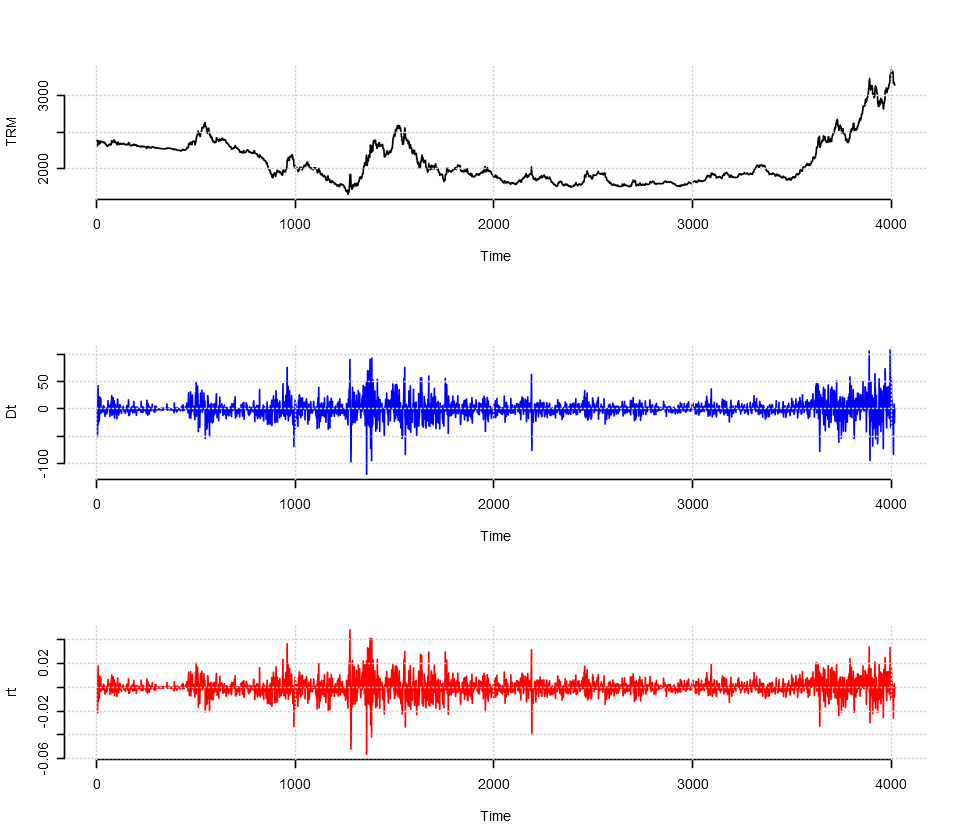

In [6]:
## graficas
options(repr.plot.width=8, repr.plot.height=7)
par(mfrow=c(3,1))

plot.ts( trm,  ylab = 'TRM', bty = 'n' );            grid()
plot.ts( Dt,   ylab = 'Dt',  bty = 'n', col="blue"); grid()
plot.ts( rt,   ylab = 'rt',  bty = 'n', col="red");  grid()

---

**Ejercicio.--** Calcule la rentabilidad bruta simple de la trm y grafíquela.

---

El análisis de la distribución de probabilidades de los rendimientos es fundamental en el modelado de precios: 

* Describe la probabilidad de que un rendimiento tome un valor determinado.

* Crea un punto de referencia del comportamiento de un mercado.

* Permite evaluar modelos de precios contra el punto de referencia.

* Permite comparar modelos.

# Modelos de paseo aleatorio

[Contenido](#Contenido)

## Modelo de paseo aleatorio con estados discretos

[Contenido](#Contenido)

Sea $n$ la cantidad de pasos dados por una partícula en una unidad de tiempo y $v_n$ la distancia total recorrida. Cada paso tiene una longitud $\delta$ y probabilidades $p$ y $q$ (con $p$ + $q$ = 1) de que sea positivo (hacia arriba) o negativo respectivamente. 

<img src="images/paseo-aleatorio.jpg" width=500>

La distancia recorrida por la partícula en una unidad de tiempo será:

$$\mu = E[v_n] = n~(p-q)~\delta$$

y la varianza:

$$\sigma^2=V[v_n] = 4~npq~\delta^2$$

Por el Teorema del Límite Central, si $u$ = $v_n$, entonces $u$ tiende a una distribución normal con media $\mu$ y varianza $\sigma^2$.   

## Paseo aleatorio continuo

[Contenido](#Contenido)

Si: 
* $F$ es una distribución cualquiera con media $\mu$ y varianza $\sigma^2$.
* $u_i$ es un valor muestral obtenido de $F$.
* $x_0$ es un punto inicial arbitrario.

entonces la secuencia $x_0, ~x_1, ...$ es un paseo aleatorio con pasos $u_i$. En este caso, $x_t = x_0 + u_1 + ...+ u_t$.

En este caso:
* $\mu$ es la deriva (drift).
* $\sigma$ es la volatilidad (desviación estándar).

$$E(x_t|x_0) = x_0 + \mu~t$$

$$V(x_t|x_0) = \sigma^2~t$$

$$(x_t | x_0) \sim N(x_0+\mu~t, \sigma^2~t)$$

## Proceso Browniano con deriva o proceso de Wiener

[Contenido](#Contenido)

Se define cuando en la secuencia $x_0,~x_1,~x_2,...$:

$$x_t - x_{t-1} \sim N(\mu, \sigma^2)$$

## Proceso Browniano estándar

[Contenido](#Contenido)

Es un proceso de Wiener con $\mu = 0$ y $\sigma = 1$. En este caso:

$$x_t = x_{t-1} + \sigma ~ z_t$$

y $z_t$ sigue una distribución normal estandar.

## Proceso Browniano con tendencia

[Contenido](#Contenido)

En este caso:

$$x_t = x_0 + \mu~t+\sigma~z_t$$

---

**Ejercicio.--** Genere 200 puntos de la serie $x_t$ si $\mu=0.017$ y $\sigma = 0.28$ y grafiquela. Suponga que el último valor conocido es $x_{100}$; pronostique los 100 valores siguientes y grafiquelos en la figura anterior, y adicione los intervalos de confianza para una desviación estándar.

---

## Proceso Browniano geométrico o exponencial

[Contenido](#Contenido)

$$x_t = x_0 \exp \Bigg[ \Big( \mu - 0.5 \sigma^2 \Big)~t~+~\sigma~z_t \Bigg]$$

## Proceso de Orstein-Uhlenbeck o reversión a la media

[Contenido](#Contenido)

$$x_t = \theta_0 + \theta_1~x_{t-1} + \sigma~z_t$$ 

# Modelos de precios

[Contenido](#Contenido)

## Representación general

[Contenido](#Contenido)

Existen componentes deterministicas en la estructura de los precios:

$$P_t = f(t)+ x_t  ~~\text{o}~~ x_t = P_t - f(t)$$

donde:

* $P_t$ es el precio; puede ser reemplazado por $p_t = \log(P_t)$.

* $f(t)$ es la componente determinística que incluye tendencia, ciclos de largo plazo, efectos calendario, etc.

* $x_t$ es un proceso estocástico continuo

### Prueba ACF y PACF serie con tendencia

[Contenido](#Contenido)

In [ ]:
## Serie con tendencia

x <- c( 29.22, 30.96, 32.57, 35.73,
        33.50, 39.49, 34.60, 38.94,
        39.56, 37.34, 39.73, 39.96,
        44.80, 47.09, 41.40, 47.13,
        45.41, 41.48, 45.31, 49.15,
        49.16, 43.49, 51.85, 52.84,
        51.24 )
x <- ts(x, freq=1)

In [ ]:
## Prueba ACF
options(repr.plot.width=8, repr.plot.height=4)

acf(x,                 # Serie con tendencia
    ylim=c(-1,1))      # Limites eje y

In [ ]:
## Prueba PACF de una serie con tendencia
options(repr.plot.width=8, repr.plot.height=4)

pacf(x,                    # Serie con tendencia
     ylim=c(-1,1))         # Limites eje y

### Prueba ACF y PACF serie con tendencia y ciclo

[Contenido](#Contenido)

In [ ]:
## Serie de tiempo con tendencia y ciclo
x <- c( 13.10, 13.28, 12.07, 11.35,
        12.91, 13.34, 12.08, 11.59,
        12.70, 13.93, 12.80, 12.41,
        13.74, 14.41, 13.29, 12.66,
        13.48, 14.45, 13.98, 13.03,
        15.05, 15.10, 14.29, 13.56)

x <- ts(x, freq=4)

In [ ]:
## Prueba ACF
options(repr.plot.width=8, repr.plot.height=4)

acf(x,                 # Serie con tendencia
    ylim=c(-1,1))      # Limites eje y

In [ ]:
## Prueba PACF

options(repr.plot.width=8, repr.plot.height=4)

pacf(x,                 # Serie con tendencia
    ylim=c(-1,1))       # Limites eje y

### Prueba ACF y PACF de un proceso autorregresivo

[Contenido](#Contenido)

In [ ]:
x <- c( -3.10,  3.20, -1.88,  2.31,
        -1.07, -0.30, -1.62,  1.78,
        -3.60,  1.73, -3.57,  1.62,
        -1.06,  1.65, -1.84,  3.02,
        -2.25,  1.33, -1.46, -1.47,
        1.67,  -0.98, -0.57,  1.69,
        -1.11, -0.86, -0.33,  1.83,
        -1.14,  0.86, -0.79,  1.82,
        -1.09,  1.20, -0.71,  1.18,
        -1.26,  0.48, -0.17,  1.18,
        0.04,   0.50,  0.85, -0.44,
        0.08,  -0.84,  0.98, -1.38,
        0.81,  -1.94  )

x <- ts(x, freq=1)

In [ ]:
## Prueba ACF
options(repr.plot.width=8, repr.plot.height=4)

acf(x,                 # Serie con tendencia
    ylim=c(-1,1))      # Limites eje y

In [ ]:
## Prueba PACF

options(repr.plot.width=8, repr.plot.height=4)

pacf(x,                 # Serie con tendencia
    ylim=c(-1,1))       # Limites eje y

### Prueba ACF y PACF de un proceso de medias moviles

[Contenido](#Contenido)

In [ ]:
x <- c( 1.22,   0.59, -0.25,  0.74,
        1.28,   1.11,  0.60,  0.44,
        0.90,   0.15,  0.29, -0.24,
        -0.45, -0.03, -0.16,  0.47,
        0.70,  -0.07, -0.43, -0.75,
        -0.16, -0.75, -0.56,  0.25,
        0.49,  -0.56,  0.20, -0.12,
        -0.94,  0.45, -0.55, -1.37,
        -0.69,  0.30, -0.21,  0.90,
        0.54,   1.28,  0.59,  1.12,
        0.14,   1.77,  0.76,  0.78,
        1.36,   1.48,  0.41,  0.15,
        -0.83, -1.94 )

x <- ts(x, freq=1)

In [ ]:
## Prueba ACF
options(repr.plot.width=8, repr.plot.height=4)

acf(x,                 # Serie con tendencia
    ylim=c(-1,1))      # Limites eje y

In [ ]:
## Prueba ACF
options(repr.plot.width=8, repr.plot.height=4)

acf(x,                 # Serie con tendencia
    ylim=c(-1,1))      # Limites eje y

## Proceso Browniano con tendencia

[Contenido](#Contenido)

Modelo continuo:
$$dx_t=μ*dt+σ*dz_t$$


Modelo discreto:
$$x_t=x_{t-1}+μ +σ*ε_t$$


Interpretación: Si $x_t=P_t$, entonces:
$x_t-x_{t-1}=P_t-P_{t-1}=D_t$  ~ $N[μ,σ^2 ]$



**Pronostico $h$ periodos adelante:**

$x_{t+h}-x_t=(x_{t+h}-x_{t+h-1} )+⋯+(x_{t+1}-x_t )=$ $\sum_{i=1}^{h} D_{t+i} $

$x_{t+h}-x_t$   ~   $N[μh,σ^2 h]$

$x_{t+h}=x_t+μh+σε_{t+h} \sqrt{h}$

## Genereación de la serie sintética

[Contenido](#Contenido)

In [ ]:
T = 600
P = rep(0, T)
for(t in 2:T)
  {
  P[t] = P[t-1] + 0.01667 + 0.2887 * rnorm(1) 
  }

## pronostico e intervalos de confianza
F = rep(0, T); U = rep(0, T); L = rep(0, T)
H = 300
F[H] = L[H] = U[H] = P[H]  

for(t in 1:300)
  {
  F[H+t] = F[H] + 0.01667 * t
  L[H+t] = F[H] + 0.01667 * t + 0.2887 * sqrt(t)
  U[H+t] = F[H] + 0.01667 * t - 0.2887 * sqrt(t)
  }
  
## Grafico
plot(P, type='l', lwd = 2, col = 'black', xlab = 't', 
     ylab = 'P[t]', ylim = c(min(P, L[T]), max(P, U[T])))
lines(x = H:T, y = F[H:T], type = 'l', lwd = 2, col = 'red' )
lines(x = H:T, y = L[H:T], type = 'l', lwd = 2, col = 'red' )
lines(x = H:T, y = U[H:T], type = 'l', lwd = 2, col = 'red' )

grid()

---

[Contenido](#Contenido)